In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
datasets = ['QUES.csv', 'UIMS.csv']

In [3]:
def pcaAnalysis(dataset):
    data = pd.read_csv("../dataset/" + dataset)
    data = data.drop(columns=['change'])
    print(data.shape)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_

    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.title(f'Explained Variance Ratio by Principal Component (Dataset: {dataset})' )
    plt.show()
    
    cumulative_explained_variance = explained_variance_ratio.cumsum()
    num_components = len(cumulative_explained_variance[cumulative_explained_variance < 0.9]) + 1
    print("Number of components explaining 90% variance:", num_components)
    
    X_pca_selected = X_pca[:, :num_components]

(71, 9)


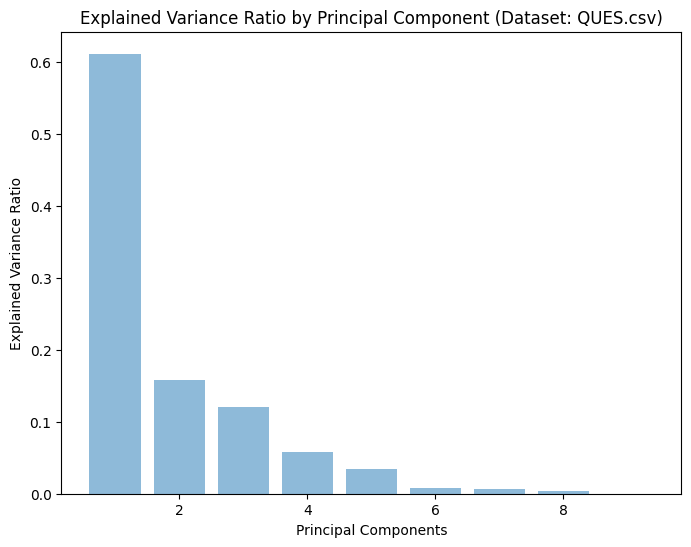

Number of components explaining 90% variance: 4
(39, 10)


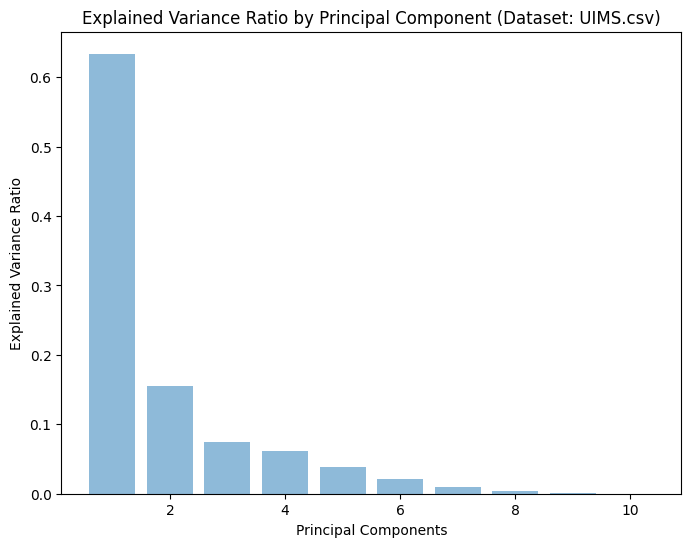

Number of components explaining 90% variance: 4


In [4]:
for dataset in datasets:
    pcaAnalysis(dataset)